In [5]:
import sympy as sp

# symbols
omega = sp.symbols('omega', real=True)

# matrix
M = sp.Matrix([
    [-2*omega**2 + 3000, -2000, 0],
    [-2000, -omega**2 + 3000, -1000],
    [0, -1000, -2*omega**2 + 1000]
])

# determinant (characteristic equation)
char_poly = sp.simplify(M.det())

# solve for omega (including negative roots); can take positive sqrt of omega^2 if desired
roots = sp.solve(sp.Eq(char_poly, 0), omega)

# show results
print("Characteristic polynomial (in terms of omega):")
print(sp.factor(char_poly))

print("\nExact roots for omega:")
for r in roots:
    print(r)

print("\nNumeric approximations (positive frequencies):")
numeric_roots = [sp.N(r) for r in roots]
print(numeric_roots)

Characteristic polynomial (in terms of omega):
-4*(omega**6 - 5000*omega**4 + 4250000*omega**2 - 500000000)

Exact roots for omega:

Numeric approximations (positive frequencies):
[]


In [6]:
char_poly

-4*omega**6 + 20000*omega**4 - 17000000*omega**2 + 2000000000

In [7]:
x = sp.symbols('x', real=True)# polynomial in x = omega^2
poly_x = x**3 - 5000*x**2 + 4250000*x - 500000000

# solve for x (omega^2)
x_roots = sp.nroots(poly_x)   # numeric complex roots

# filter real nonnegative roots and compute omegas
omega_roots = []
for xr in x_roots:
    if abs(sp.im(xr)) < 1e-12 and sp.re(xr) >= 0:
        omega_roots.append(sp.sqrt(sp.re(xr)).evalf())
    else:
        # include complex or negative x if desired:
        omega_roots.append(None)

print("Roots for x = omega^2 (numeric):")
print(x_roots)
print("\nPhysical natural frequencies omega (positive real roots):")
print([r for r in omega_roots if r is not None])

Roots for x = omega^2 (numeric):
[140.088020999645, 901.721203127869, 3958.19077587249]

Physical natural frequencies omega (positive real roots):
[11.8358785478580, 30.0286730164333, 62.9141540185711]


Computed positive natural frequencies (omega): [11.835878547857993, 30.0286730164333, 62.9141540185711]


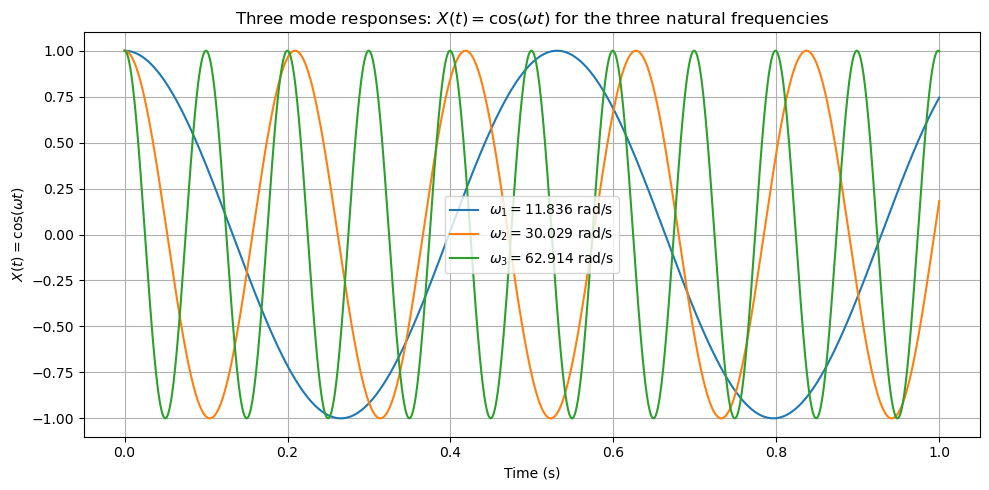

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# 1) Solve for x = omega^2 using SymPy
x = sp.symbols('x', real=True)
poly_x = x**3 - 5000*x**2 + 4250000*x - 500000000

# numeric roots
x_roots = sp.nroots(poly_x)

# filter real non-negative roots and compute omegas
omega_list = []
for xr in x_roots:
    if abs(sp.im(xr)) < 1e-12 and sp.re(xr) >= 0:
        omega_list.append(float(sp.sqrt(sp.re(xr))))
    else:
        # include complex roots if needed (here we ignore non-physical)
        pass

# Sort ascending for nicer plotting
omega_list = sorted(omega_list)

print("Computed positive natural frequencies (omega):", omega_list)

# 2) Prepare time vector and compute X(t)=cos(omega t) for each omega
t_max =1  # seconds; adjust to show more cycles if needed
num_points = 2000
t = np.linspace(0, t_max, num_points)

responses = [np.cos(omega * t) for omega in omega_list]

# 3) Plotting
plt.figure(figsize=(10, 5))
colors = ['C0', 'C1', 'C2']
for idx, (omega, X) in enumerate(zip(omega_list, responses)):
    plt.plot(t, X, color=colors[idx % len(colors)],
             label=rf'$\omega_{{{idx+1}}}={omega:.3f}\ \mathrm{{rad/s}}$')

plt.xlabel('Time (s)')
plt.ylabel(r'$X(t)=\cos(\omega t)$')
plt.title('Three mode responses: $X(t)=\\cos(\\omega t)$ for the three natural frequencies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()